In [1]:
import numpy as np
import pandas as pd
import MetaTrader5 as mt5
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
from backtester.data_handler import DataHandler

In [2]:
SYMBOLS = ["WTI", "BRN", "USDJPY", "EURUSD", "GBPUSD"]
TIMEFRAME = mt5.TIMEFRAME_H1
BARS = 500
WINDOW_FACTOR = 50

In [3]:
data_handler = DataHandler(SYMBOLS, TIMEFRAME, BARS)
data = data_handler.fetch_data()

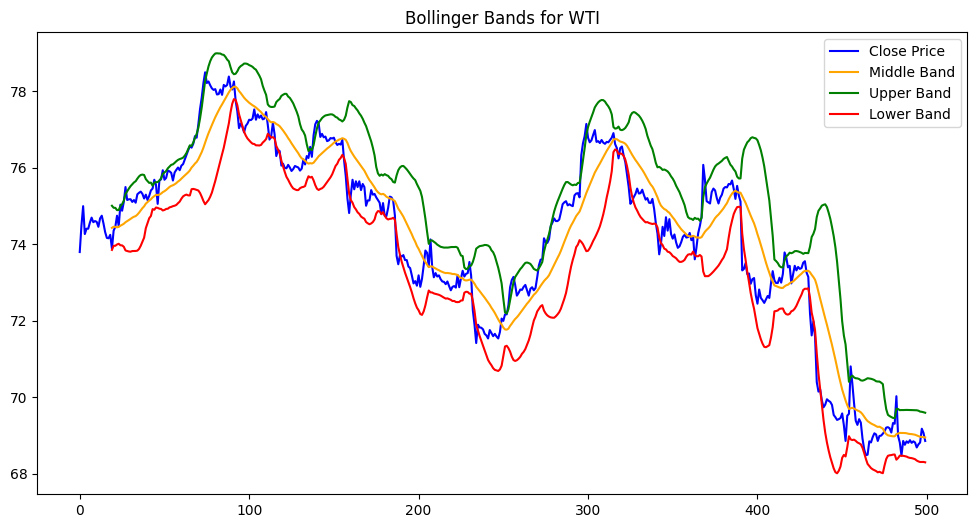

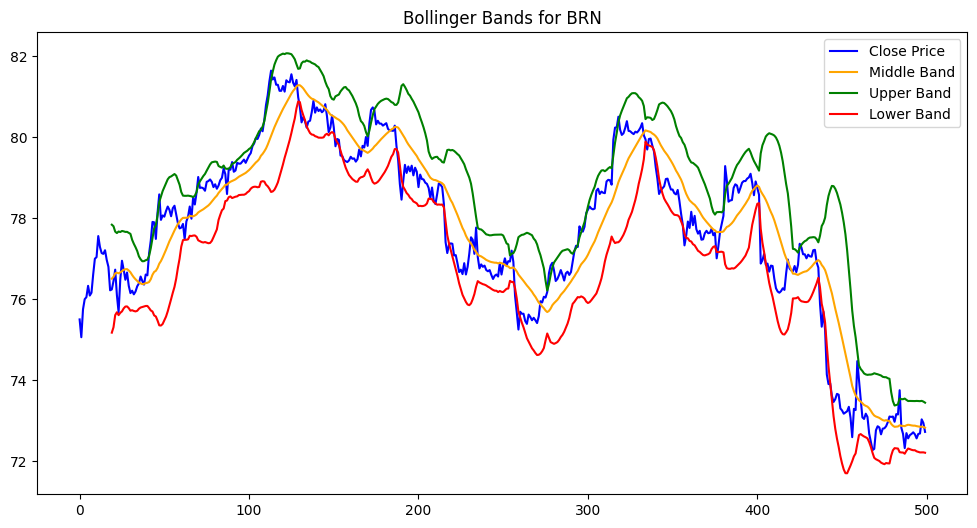

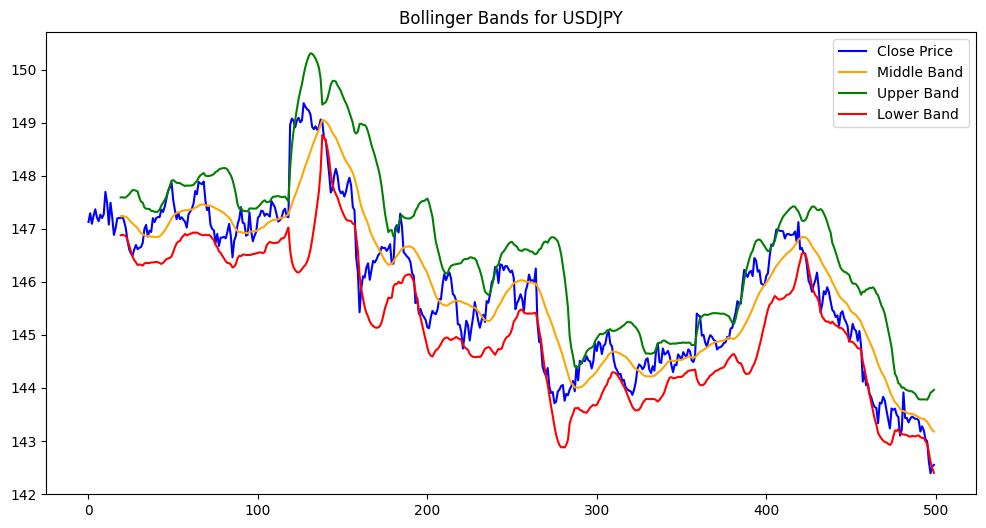

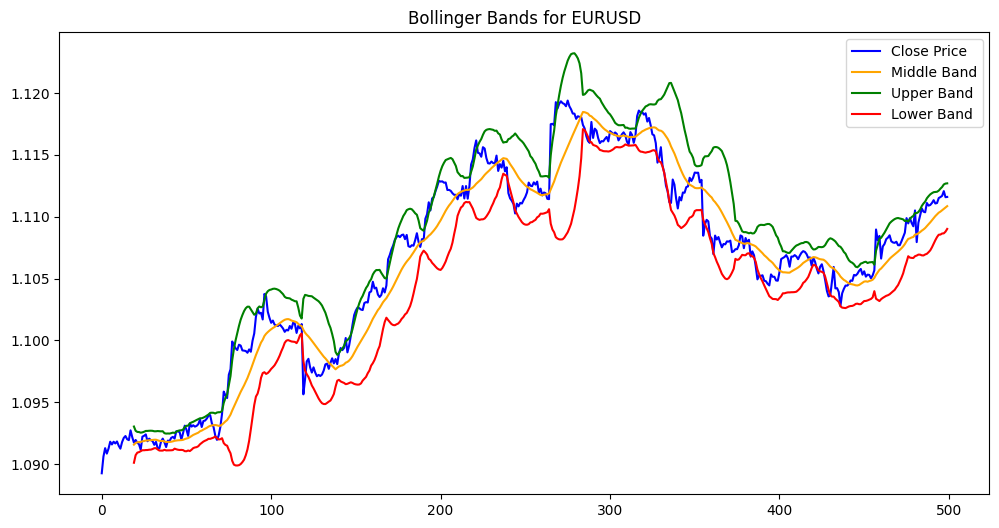

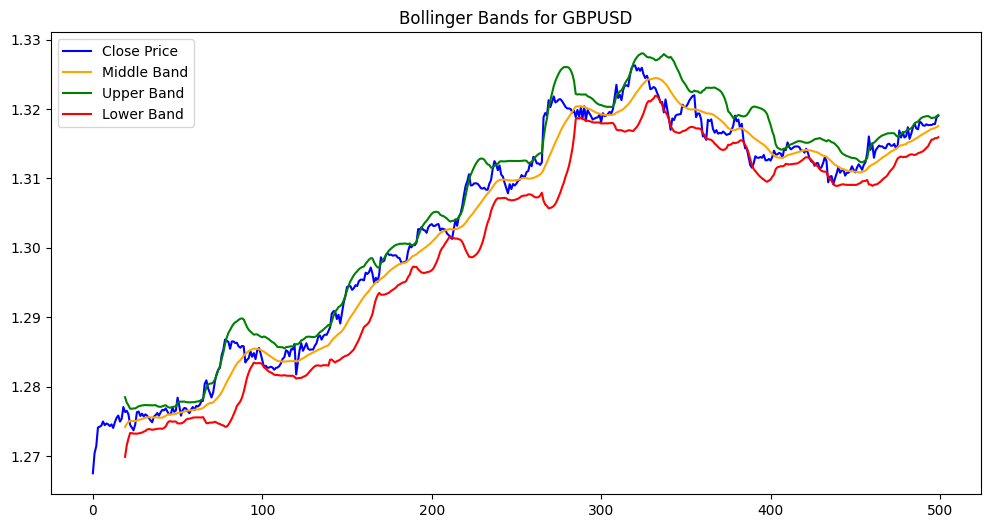

In [4]:
def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    rolling_mean = data['close'].rolling(window=window).mean()
    rolling_std = data['close'].rolling(window=window).std()
    
    data['Bollinger Middle'] = rolling_mean
    data['Bollinger Upper'] = rolling_mean + (rolling_std * num_std_dev)
    data['Bollinger Lower'] = rolling_mean - (rolling_std * num_std_dev)

# Loop over each symbol in the shared.data dictionary
for symbol, df in data.items():
    # Calculate Bollinger Bands
    calculate_bollinger_bands(df)
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(df['close'], label='Close Price', color='blue')
    plt.plot(df['Bollinger Middle'], label='Middle Band', color='orange')
    plt.plot(df['Bollinger Upper'], label='Upper Band', color='green')
    plt.plot(df['Bollinger Lower'], label='Lower Band', color='red')
    
    plt.title(f'Bollinger Bands for {symbol}')
    plt.legend()
    plt.show()